In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_42942_I')

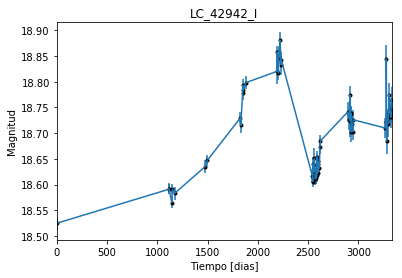

In [2]:
data = np.genfromtxt('LC_42942_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_42942_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

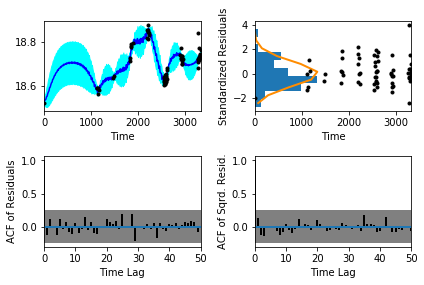

In [5]:
sample.assess_fit()

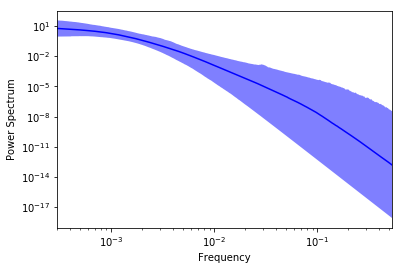

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_42942_I')

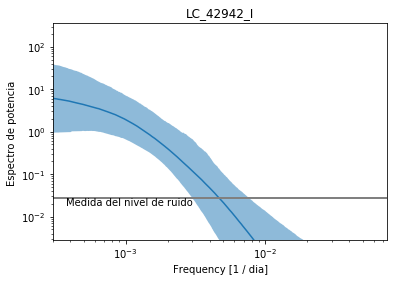

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_42942_I')

Text(0.5,1,'Prediccion , valor esperado LC_42942_I')

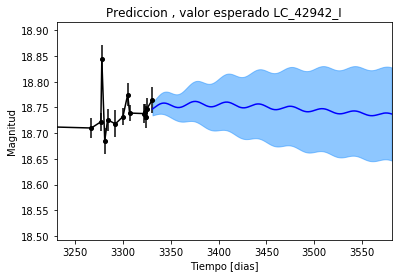

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_42942_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_42942_I')

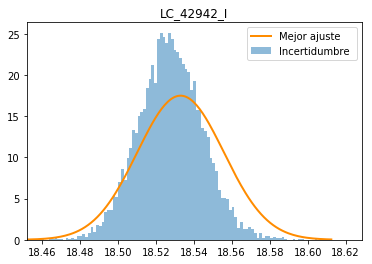

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_42942_I')

Text(0.5,1,'Interpolacion, camino simulado LC_42942_I')

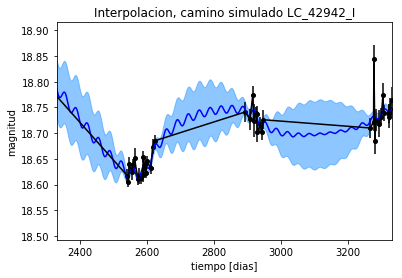

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_42942_I')

Text(0.5,1,'Interpolacion, camino simulado LC_42942_I')

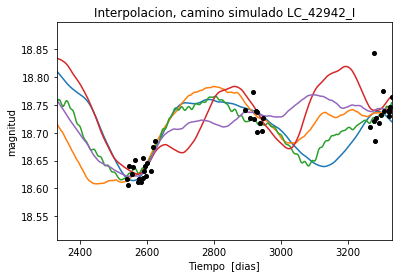

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_42942_I')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 806.537716399
Median: 0.0125607722531
Standard deviation: 0.207299280164
68% credibility interval: [ 0.00116879  0.19857429]
95% credibility interval: [  3.72152869e-04   8.06625571e-01]
99% credibility interval: [  3.12848664e-04   1.00240736e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 685.296012211
Median: 0.00216190755905
Standard deviation: 0.0992466921248
68% credibility interval: [ 0.00052159  0.02708569]
95% credibility interval: [ 0.0003252   0.31277976]
99% credibility interval: [  3.04941465e-04   7.50748449e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 559.173355548
Median: 0.0100617142255
Standard 

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1239.79147108
Median: 163.973034104
Standard deviation: 1.56627670396
68% credibility interval: [ 162.23211003  165.14307604]
95% credibility interval: [ 159.84480044  165.76204007]
99% credibility interval: [ 158.1362673   167.01691835]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 918.620070188
Median: 0.592198666553
Standard deviation: 2.26926348157
68% credibility interval: [ 0.05752114  3.93533731]
95% credibility interval: [ 0.0167682   7.71252154]
99% credibility interval: [  1.02755569e-02   1.06406257e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 577.351976252
Median: 0.31287661021
Standard deviation: 8.74567094371
68% credibility interval: [ 0.0150474   6.92089585]
95% credibility interval: [  9.94

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1520.28473472
Median: 4.93726346448e-41
Standard deviation: 7.37583451617e+50
68% credibility interval: [  9.05874781e-74   6.44057758e-14]
95% credibility interval: [  3.18815426e-98   8.95729871e+00]
99% credibility interval: [  2.39722857e-110   4.71847713e+047]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3199.9776338
Median: 18.6762014892
Standard deviation: 0.0615761287658
68% credibility interval: [ 18.62236628  18.72357743]
95% credibility interval: [ 18.54823143  18.79428075]
99% credibility interval: [ 18.46693379  18.8639084 ]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 629.206246415
Median: 0.00277948798816
Standard deviation: 0.231891126871
68% credibility interval: [ 0.          0.28035072]
95% credibility interval: [ 0.          0.85449803]
99% credibility interval: [ 0.          1.02432401]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 629.206246415
Median: 0.00277948798816
Standard deviation: 0.231891126871
68% credibility interval: [ 0.          0.28035072]
95% credibility interval: [ 0.          0.85449803]
99% credibility interval: [ 0.          1.02432401]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1217.36795078
Median: 0.0
Standard deviation: 0.000457834119125
68% 

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1239.79147108
Median: 163.973034104
Standard deviation: 1.56627670396
68% credibility interval: [ 162.23211003  165.14307604]
95% credibility interval: [ 159.84480044  165.76204007]
99% credibility interval: [ 158.1362673   167.01691835]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2397.2491026
Median: 0.0130962068864
Standard deviation: 0.01652030997
68% credibility interval: [ 0.00776533  0.02509372]
95% credibility interval: [ 0.0049864   0.06128458]
99% credibility interval: [ 0.0039826   0.10584356]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2029.16377983
Median: 1.36279237693
Standard deviation: 0.204016972245
68% credibility interval: [ 1.17631839  1.58775539]
95% credibility interval: [ 1.02254336  1.82321919]
99% credibility interval: [ 0.94257628  1.93258414]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 506.381939465
Median: 4.91167123712e-05
Standard deviation: 0.0474639477655
68% credibility interval: [  1.64533926e-06   1.57801669e-03]
95% credibility interval: [  3.54652928e-08   2.06859442e-02]
99% credibility interval: [  1.10589728e-52   2.52306494e-01]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 806.537716399
Median: (-0.0789216596675-3.3038897373j)
Standard deviation: 1.95432806536
68% credibility interval: [-1.24767909+0.j       -0.00734376-0.016437j]
95% credibility interval: [ -5.06817794e+00+0.j         -2.33830544e-03-0.0171526j]
99% credibility interval: [ -6.29831118e+00+0.j          -1.96568613e-03-0.19258117j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 685.296012211
Median: (-0.0135836658105+1.13060744489j)
Standard deviation: 1.58485052262
68% credibility interval: [-0.17018441+0.14014979j -0.00327725+0.31595308j]
95% credibility interval: [-1.96525318+3.55322042j -0.00204327+0.j        ]
99% credibility interval: [ -4.71709162e+00+1.94033768j  -1.91600373e-03+0.j        ]
Posterior summary for